# <font color = gree> 1.0 Analise do fluxo de vendas na empresa I4Hoot
- A exploração dos dados tem como objetivo, obter insights e a partir deles, traçar ações estratégicas para a organização.  

## 1.1 Sobre a empresa
A referida empresa trabalha com comércio de produtos em multicanais (presencial e online) em diversas categorias em várias regiões do brasil,

## 1.2 Sobre os dados coletados

Correspondem as vendas do período de 01-01-2023 a 05-01-2023 e tras os seguintes dados, ID da venda, Data da venda, ID do cliente, Valor da venda, Produto vendido, Categoria do produto, Região da venda e Canal de venda.  

## 1.3 Objetivo

Gerar um relatório, para organizar as vendas e faturamento da empresa, que responda às seguintes perguntas: <br>

■ Qual a média dos valores das vendas? <br>
■ Qual foi o total de vendas?<br>
■ Qual o produto mais vendido?<br>
■ Qual a categoria com maior faturamento?<br>
■ Qual o número de vendas online?<br>
■ Qual o número de vendas presenciais

## 2.0 Análise preliminar dos dados <BR>

Nesse momentos vamos carregar os dados e verificar de forma explorátorio a qualidade dos mesmos, bem como, realizar uma descrição para sabermos os tipo dos dados que vão ser trabalhados.

Importando a biblioteca pandas e matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Carregando os dados do arquivo .CSV

In [2]:
dados = pd.read_csv('dados_I4Hoot.csv')
dados

,ID venda,Data da venda,ID do cliente,Valor da venda,Produto vendido,Categoria do produto,Região da venda,Canal de venda
0,1,2023-01-01,101,100.50,A,Eletrônico,Norte,Online
1,2,2023-01-02,102,150.75,B,Moda,Sul,Presencial
2,3,2023-01-03,103,200.00,A,Eletrônico,Sudeste,Presencial
3,4,2023-01-04,104,120.25,C,Casa,Norte,Online
4,5,2023-01-05,105,180.50,B,Moda,Sul,Online


- Apresentando o formato do dataset

In [3]:
dados.shape

(5, 8)

Identificamos que o dataset tem um total de 5 linhas, que corresponde a cada dia da semana e 8 colunas.

- Os tipos de dados que encontramos no dataset

In [4]:
display(dados.dtypes)

ID venda                  int64
Data da venda            object
ID do cliente             int64
Valor da venda          float64
Produto vendido          object
Categoria do produto     object
Região da venda          object
Canal de venda           object
dtype: object

Os tipos de dados do dataset são numericos e texto.

- Verificar o percentual de dados faltantes no nosso dataset

In [5]:
(dados.isnull().sum() / dados.shape[0]).sort_values()

ID venda                0.0
Data da venda           0.0
ID do cliente           0.0
Valor da venda          0.0
Produto vendido         0.0
Categoria do produto    0.0
Região da venda         0.0
Canal de venda          0.0
dtype: float64

Com a aplicação dessa técnica de estatística descritiva, podemos ver que o percentual de dados faltantes é zero, todas os campos tem valores.

- Exibição do histograma para tentar identificar inicialmente a presença de outliers.

array([[<Axes: title={'center': 'ID venda'}>,
        <Axes: title={'center': 'ID do cliente'}>],
       [<Axes: title={'center': 'Valor da venda'}>, <Axes: >]],
      dtype=object)

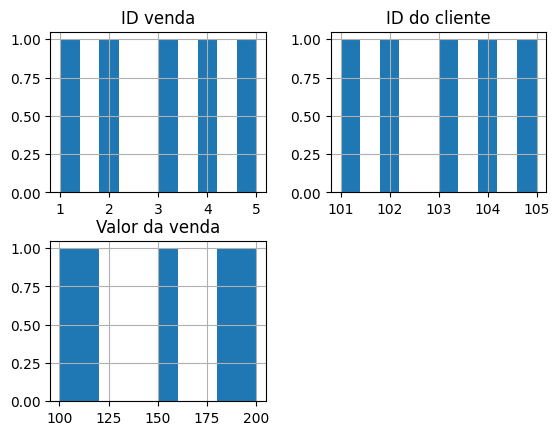

In [6]:
dados.hist()

A distribuição do histograma nos mostra que não temos presença de outliers no dataset, os números estão com certa próximidade, concluo que não temos disparidade nos dados.

- Resumo dos principais indicadores

In [7]:
dados.describe()

,ID venda,ID do cliente,Valor da venda
count,5.000000,5.000000,5.000000
mean,3.000000,103.000000,150.400000
std,1.581139,1.581139,41.125798
min,1.000000,101.000000,100.500000
25%,2.000000,102.000000,120.250000
50%,3.000000,103.000000,150.750000
75%,4.000000,104.000000,180.500000
max,5.000000,105.000000,200.000000


No resumo das estatísticas podemos perceber que no desvio padrão (std) da coluna Valor da venda, temos um grau de variação pequena em relação a média, que traz segurança para análise desse conjunto de dados.

- **Qual a média dos valores das vendas?**

In [8]:
media_vendas = dados['Valor da venda'].mean()
print(f'O valor médio das vendas: {media_vendas}')

O valor médio das vendas: 150.4


A partir do valor encontrado, a empresa I4Hoot poderá criar um planejamento da previsão de vendas e também estimar o potencial dos clientes.

- **Qual foi o total de vendas?**

In [9]:
total_vendas = dados['Valor da venda'].sum()
print(f'Total de vendas: {total_vendas}')

Total de vendas: 752.0


Com o resultado obtido no período, podemos realizar um previsão de vendas para o mês ou em um determinado período de tempo, Previsão de vendas é uma estratégia que tem como objetivo auxiliar a empresa a ter uma estimativa sobre os negócios que serão fechados.

**Qual o produto mais vendido?**

In [10]:
prod_mais_vendido = dados['Produto vendido'].value_counts().head(2)
print(f'O produto mais vendido:\n{prod_mais_vendido}')

O produto mais vendido:
A    2
B    2
Name: Produto vendido, dtype: int64


Os dados mostram a preferência dos nossos clientes para a aquisição dos produtos A e B, devemos analisar o estoque para atender a demanda no período determinado, visto que, o faturamento desses produtos no período corresponde a mais de 75% do total de vendas.

- **Qual a categoria com maior faturamento?**


In [11]:
categoria_maior_faturamento = dados.groupby('Categoria do produto')['Valor da venda'].sum(numeric_only=True).reset_index().sort_values(by = 'Valor da venda', ascending=False).head(1)
categoria_maior_faturamento

,Categoria do produto,Valor da venda
2,Moda,331.25


Podemos ver que a categoria MODA é nível A dentro do método Curva ABC, porque são aqueles produtos que mais contribuem com o faturamento (44%), esses produtos devem ser priorizados para que sempre estejam disponíveis em estoque.

**Qual o número de vendas online?**

In [12]:
total_vendas_online = dados['Canal de venda'].value_counts(ascending=False).head(1)
print(f'Total de vendas {total_vendas_online}')

Total de vendas Online    3
Name: Canal de venda, dtype: int64


As vendas online representam 53,33% do faturamento e a maior parte das vendas em quantidade, se concentram na região Norte e Sul, temos que reforçar a estratégia da experiência de compra online para os clientes que compraram presencial.

- **Qual o número de vendas presenciais?**


In [13]:
total_vendas_presencial = dados['Canal de venda'].value_counts(ascending=True).head(1)
print(f'Total de vendas {total_vendas_presencial}')

Total de vendas Presencial    2
Name: Canal de venda, dtype: int64


As compras presenciais representam quase metade das vendas, se concentram na região sul e sudeste, podemos exercer influência para que os clientes que compraram online possam conhecer a loja através de descontos e com a possibilidade de experimentar os produtos, como forma de aumentar as vendas pelo canal presencial.

## Considerações finais

Como podemos verificar através dos dados, temos que reforçar o canal de venda presencial na região norte e o online na região sudeste, através de descontos e/ou experiência de experimentar os produtos, com foco na categoria MODA que até momento contribue com o faturamento de (44%), reforço também atenção ao estoque dos produtos A e B, a cada 5 dias são vendidos 2 produtos cada, correspondendo com mais de 75% do total vendido no período.